In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [34]:
logins = pd.read_json('logins.json')

In [35]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [36]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [37]:
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins.sort_index(inplace=True)
login_agg = logins.resample("15min").sum()

In [43]:
login_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


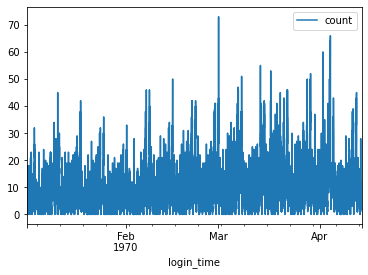

In [41]:
_ = login_agg.plot()

([<matplotlib.axis.XTick at 0x18f331057c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

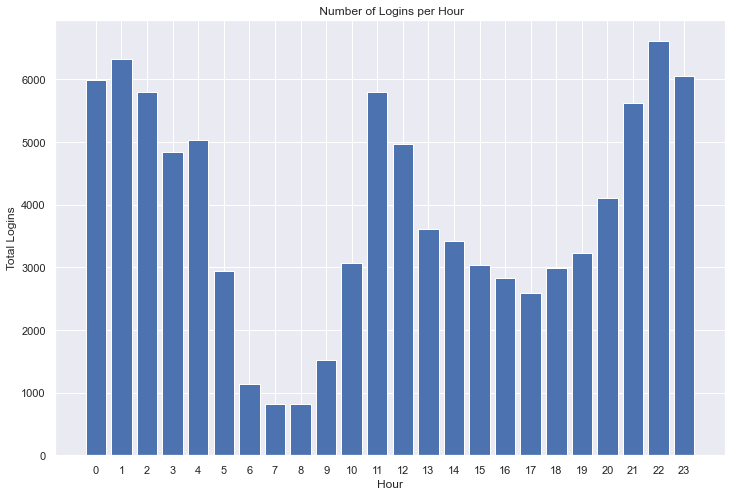

In [52]:
logins_hour = logins.groupby(logins.index.hour).sum()

sns.set()
plt.figure(figsize=(12,8))
plt.bar(logins_hour.index, logins_hour['count'])
plt.title(' Number of Logins per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Logins')
plt.xticks(logins_hour.index)

([<matplotlib.axis.XTick at 0x18f31d75ee0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

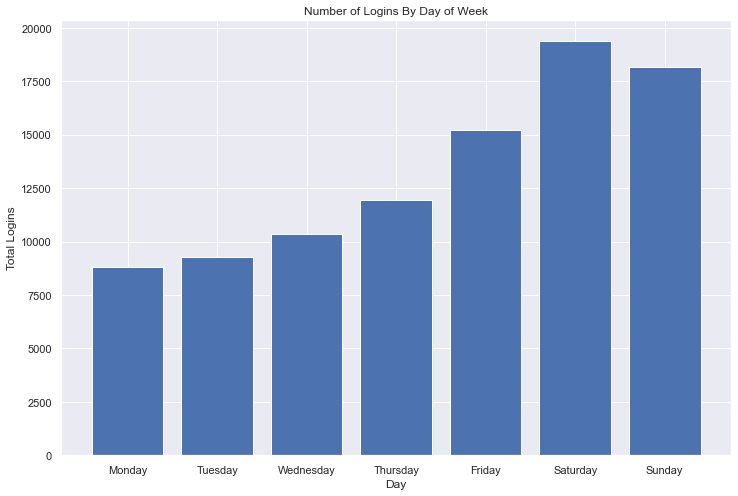

In [53]:
logins_day = logins.groupby(logins.index.dayofweek).sum()

sns.set()
plt.figure(figsize=(12,8))
plt.bar(logins_day.index, logins_day['count'])
plt.title('Number of Logins By Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Logins')
plt.xticks(logins_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

([<matplotlib.axis.XTick at 0x18f3397e1f0>,
 [Text(30.0, 0, 'January'),
  Text(58.0, 0, 'February'),
  Text(89.0, 0, 'March'),
  Text(119.0, 0, 'April')])

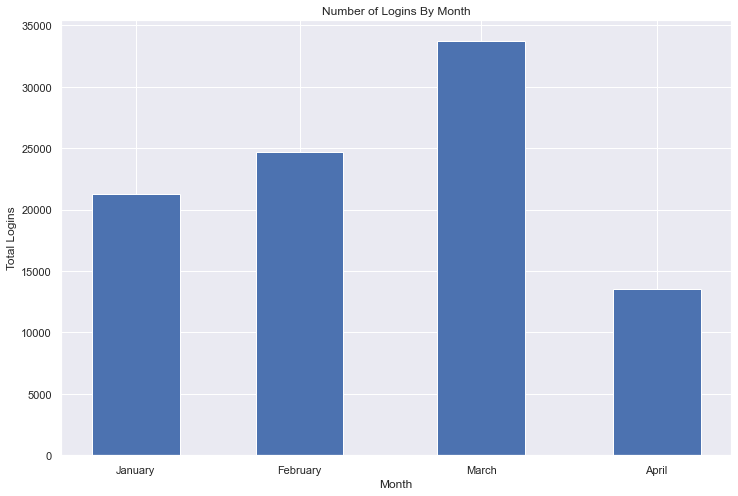

In [57]:
x = logins['count'].resample('M').sum().index
y = logins['count'].resample('M').sum()
sns.set()
plt.figure(figsize=(12,8))
plt.bar(x,y, width=15)
plt.title('Number of Logins By Month')
plt.xlabel('Month')
plt.ylabel('Total Logins')
plt.xticks(x, ['January', 'February', 'March', 'April'])